In [27]:
import numpy as np 
try:
    import matplotlib
    matplotlib.rcParams['text.usetex'] = True
except:
    pass
import matplotlib.pyplot as plt
import dcs.localEquilibrium 
import dcs.vmec
from dcs.toroidalField import normalize

In [28]:
surfField_heliotron = dcs.localEquilibrium.ArbitrarySurfaceField.readVMEC("wout_heliotron.nc") 

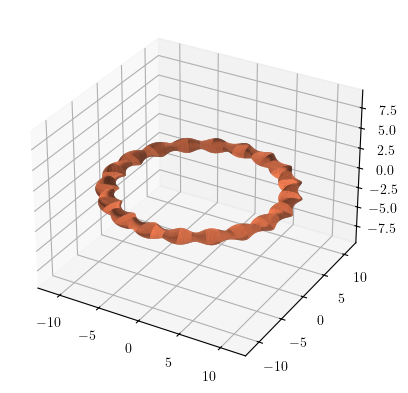

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
_ = surfField_heliotron.surf.plot_plt(fig=fig, ax=ax)

In [30]:
surfField_heliotron.solveJacobian()
surfField_heliotron.solveJacobianReciprocal()

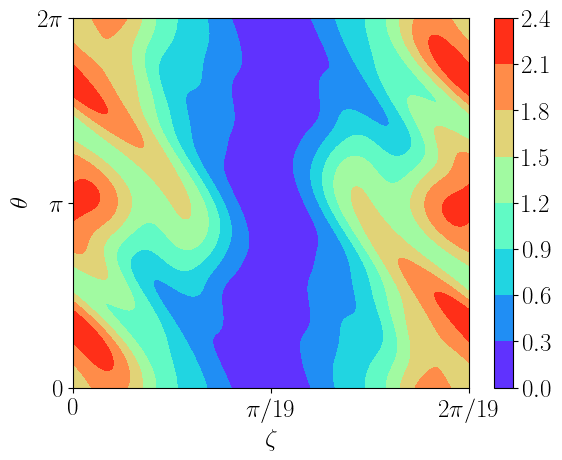

In [31]:
fig, ax = plt.subplots()
surfField_heliotron.Jacobian.plot_plt(ax=ax, fig=fig)

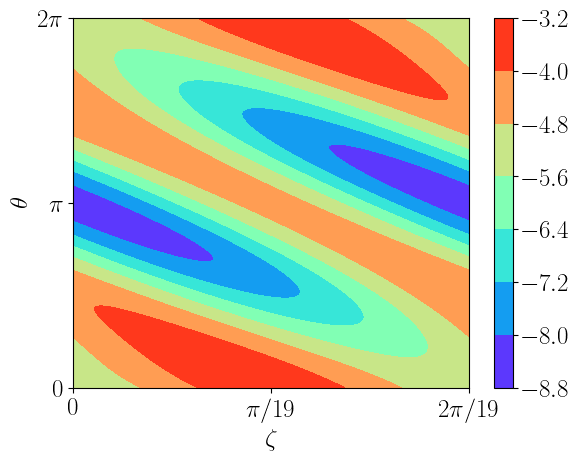

In [32]:
vmecJacobian = dcs.vmec.VMECOut("wout_heliotron.nc").getJacobian()

fig, ax = plt.subplots()
vmecJacobian.plot_plt(ax=ax, fig=fig)

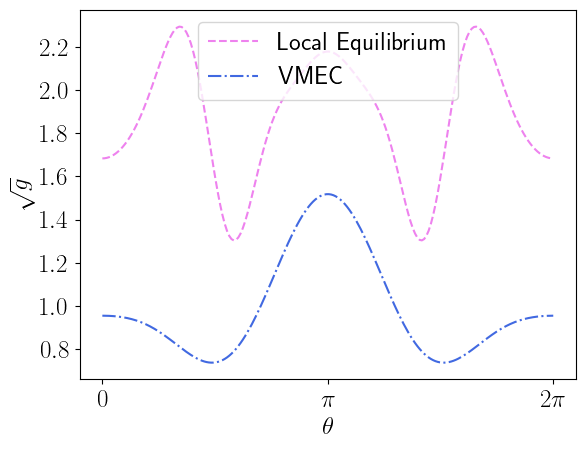

In [33]:
fig, ax = plt.subplots()
zetaValue = 0
ax.plot(
    np.linspace(0,2*np.pi,200), 
    normalize(surfField_heliotron.Jacobian).getValue(np.linspace(0,2*np.pi,200),np.ones(200)*zetaValue).flatten(), 
    c = "violet", 
    ls = "--", 
    label = "Local Equilibrium"
)
ax.plot(
    np.linspace(0,2*np.pi,200), 
    c = "royalblue", 
    ls = "-.", 
    label = "VMEC"
)
ax.legend(fontsize=18)
ax.set_xlabel(r"$\theta$", fontsize=18)
ax.set_ylabel(r"$\sqrt{g}$", fontsize=18)
ax.set_xticks(np.linspace(0, 2*np.pi, 3))
ax.set_xticklabels(["$0$", r"$\pi$", r"$2\pi$"], fontsize=18)
_ = plt.yticks(fontsize=18)

In [34]:
j111 = surfField_heliotron.Jacobian
temp = normalize(j111)

In [35]:
print(j111.getRe(0,0))
print(temp.getRe(0,0))

1.0
1.0
